In [1]:
pip install textblob deepface opencv-python librosa soundfile numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import pandas as pd
from textblob import TextBlob
from deepface import DeepFace
import librosa
import soundfile as sf
import hashlib
from datetime import datetime
import os

# ==============================================
# 1. Text Sentiment Analysis
# ==============================================
def analyze_text_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return "happy"
    elif sentiment_polarity < 0:
        return "sad"
    else:
        return "neutral"

# ==============================================
# 2. Facial Expression Detection
# ==============================================
def detect_facial_emotion(image_path):
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    result = DeepFace.analyze(img_path=image_path, actions=['emotion'])
    return result[0]['dominant_emotion']

# ==============================================
# 3. Speech Emotion Recognition
# ==============================================
def extract_speech_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract features (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)

    return mfccs_mean

def predict_speech_emotion(audio_path, model):
    features = extract_speech_features(audio_path)
    emotion = model.predict([features])[0]
    return emotion

# Dummy model for speech emotion recognition (replace with a trained model)
from sklearn.ensemble import RandomForestClassifier
speech_model = RandomForestClassifier()

# ==============================================
# 4. Task Recommendation
# ==============================================
def recommend_task(emotion):
    task_recommendations = {
        "happy": "Work on a creative project or brainstorm new ideas.",
        "sad": "Take a short break and listen to calming music.",
        "angry": "Step away from the desk and take a walk.",
        "neutral": "Focus on routine tasks or organize your workspace.",
        "surprise": "Explore a new tool or learn something new.",
        "fear": "Review your tasks and prioritize what's most important.",
        "disgust": "Clean your workspace or declutter your environment."
    }
    return task_recommendations.get(emotion.lower(), "No specific recommendation.")

# ==============================================
# 5. Historical Mood Tracking
# ==============================================
mood_history = {}

def track_mood(employee_id, mood):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if employee_id not in mood_history:
        mood_history[employee_id] = []
    mood_history[employee_id].append((timestamp, mood))

# ==============================================
# 6. Stress Management Alert
# ==============================================
def check_stress_level(employee_id, threshold=3):
    if employee_id in mood_history:
        negative_moods = [mood for (_, mood) in mood_history[employee_id] if mood in ["sad", "angry", "fear"]]
        if len(negative_moods) >= threshold:
            print(f"Alert: Employee {employee_id} may be experiencing prolonged stress. Notify HR.")

# ==============================================
# 7. Data Privacy and Anonymization
# ==============================================
def anonymize_employee_id(employee_id):
    return hashlib.sha256(employee_id.encode()).hexdigest()

# ==============================================
# Main Function to Run the System
# ==============================================
def main():
    # Example employee ID
    employee_id = "123"
    anonymized_id = anonymize_employee_id(employee_id)

    # Analyze text sentiment
    text_input = "I feel great about the progress we're making!"
    text_mood = analyze_text_sentiment(text_input)
    print(f"Text Mood: {text_mood}")
    track_mood(anonymized_id, text_mood)

    # Analyze facial expression
    image_path = "employee_face.jpg"  # Replace with actual image path
    try:
        facial_mood = detect_facial_emotion(image_path)
        print(f"Facial Mood: {facial_mood}")
        track_mood(anonymized_id, facial_mood)
    except FileNotFoundError as e:
        print(e)

    # Analyze speech emotion
    audio_path = "employee_speech.wav"  # Replace with actual audio path
    if os.path.isfile(audio_path):
        speech_mood = predict_speech_emotion(audio_path, speech_model)
        print(f"Speech Mood: {speech_mood}")
        track_mood(anonymized_id, speech_mood)
    else:
        print(f"Audio file not found: {audio_path}")

    # Recommend task based on overall mood
    overall_mood = text_mood  # Use text mood as the overall mood for simplicity
    task = recommend_task(overall_mood)
    print(f"Recommended Task: {task}")

    # Check stress level
    check_stress_level(anonymized_id)

    # Display mood history
    print(f"Mood History for Employee {anonymized_id}: {mood_history[anonymized_id]}")

if __name__ == "__main__":
    main()


Text Mood: happy
Image file not found: employee_face.jpg
Audio file not found: employee_speech.wav
Recommended Task: Work on a creative project or brainstorm new ideas.
Mood History for Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3: [('2025-03-18 18:50:24', 'happy')]


In [ ]:
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
from datetime import datetime
import hashlib

# ==============================================
# 1. Task Recommendation
# ==============================================
def recommend_task(emotion):
    task_recommendations = {
        "happy": "Work on a creative project or brainstorm new ideas.",
        "sad": "Take a short break and listen to calming music.",
        "angry": "Step away from the desk and take a walk.",
        "neutral": "Focus on routine tasks or organize your workspace.",
        "surprise": "Explore a new tool or learn something new.",
        "fear": "Review your tasks and prioritize what's most important.",
        "disgust": "Clean your workspace or declutter your environment."
    }
    return task_recommendations.get(emotion.lower(), "No specific recommendation.")

# ==============================================
# 2. Historical Mood Tracking
# ==============================================
mood_history = {}

def track_mood(employee_id, mood):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if employee_id not in mood_history:
        mood_history[employee_id] = []
    mood_history[employee_id].append((timestamp, mood))

# ==============================================
# 3. Stress Management Alert
# ==============================================
def check_stress_level(employee_id, threshold=3):
    if employee_id in mood_history:
        negative_moods = [mood for (_, mood) in mood_history[employee_id] if mood in ["sad", "angry", "fear"]]
        if len(negative_moods) >= threshold:
            print(f"Alert: Employee {employee_id} may be experiencing prolonged stress. Notify HR.")

# ==============================================
# 4. Data Privacy and Anonymization
# ==============================================
def anonymize_employee_id(employee_id):
    return hashlib.sha256(employee_id.encode()).hexdigest()

# ==============================================
# 5. Real-Time Emotion Detection Using Webcam
# ==============================================
def real_time_emotion_detection(employee_id):
    # Initialize webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Save the frame as a temporary image
        temp_image_path = "temp_frame.jpg"
        cv2.imwrite(temp_image_path, frame)

        try:
            # Analyze the frame for emotions
            result = DeepFace.analyze(img_path=temp_image_path, actions=['emotion'], enforce_detection=False)
            dominant_emotion = result[0]['dominant_emotion']

            # Display the emotion on the frame
            cv2.putText(frame, f"Emotion: {dominant_emotion}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Track mood
            track_mood(employee_id, dominant_emotion)

            # Recommend task
            task = recommend_task(dominant_emotion)
            cv2.putText(frame, f"Task: {task}", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Check stress level
            check_stress_level(employee_id)

        except Exception as e:
            print(f"Error during emotion detection: {e}")

        # Display the frame
        cv2.imshow("Real-Time Emotion Detection", frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

# ==============================================
# Main Function to Run the System
# ==============================================
def main():
    # Example employee ID
    employee_id = "123"
    anonymized_id = anonymize_employee_id(employee_id)

    # Start real-time emotion detection
    real_time_emotion_detection(anonymized_id)

    # Display mood history (if any)
    if anonymized_id in mood_history:
        print(f"Mood History for Employee {anonymized_id}: {mood_history[anonymized_id]}")
    else:
        print(f"No mood data recorded for Employee {anonymized_id}.")

if __name__ == "__main__":
    main()

Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be experiencing prolonged stress. Notify HR.
Alert: Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3 may be ex

In [2]:
import cv2
import numpy as np
import sqlite3
import logging
from typing import Dict, List, Tuple, Optional
from concurrent.futures import ThreadPoolExecutor
import hashlib
from datetime import datetime

# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

class EmotionAnalyzer:
    """Class for handling multi-modal emotion analysis"""
    
    @staticmethod
    def analyze_face(frame: np.ndarray) -> str:
        """Analyze facial emotions from video frame"""
        try:
            temp_path = "temp_frame.jpg"
            cv2.imwrite(temp_path, frame)
            result = DeepFace.analyze(img_path=temp_path, 
                                    actions=['emotion'], 
                                    enforce_detection=False)
            return result[0]['dominant_emotion']
        except Exception as e:
            logging.error(f"Face analysis error: {e}")
            return "unknown"

class DataManager:
    """Class for handling data storage and privacy"""
    
    def __init__(self):
        self.conn = sqlite3.connect('mood_data.db', check_same_thread=False)
        self._init_db()
        
    def _init_db(self):
        """Initialize database tables"""
        with self.conn:
            self.conn.execute('''
                CREATE TABLE IF NOT EXISTS mood_history (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    employee_hash TEXT NOT NULL,
                    timestamp DATETIME NOT NULL,
                    mood TEXT NOT NULL,
                    source TEXT NOT NULL
                )
            ''')
            
    def store_mood(self, employee_hash: str, mood: str, source: str):
        """Store mood data in database"""
        try:
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            with self.conn:
                self.conn.execute('''
                    INSERT INTO mood_history 
                    (employee_hash, timestamp, mood, source)
                    VALUES (?, ?, ?, ?)
                ''', (employee_hash, timestamp, mood, source))
        except Exception as e:
            logging.error(f"Database error: {e}")

    def get_mood_history(self, employee_hash: str) -> List[Tuple]:
        """Retrieve mood history for an employee"""
        try:
            cursor = self.conn.cursor()
            cursor.execute('''
                SELECT timestamp, mood, source 
                FROM mood_history 
                WHERE employee_hash = ?
                ORDER BY timestamp DESC
            ''', (employee_hash,))
            return cursor.fetchall()
        except Exception as e:
            logging.error(f"Database error: {e}")
            return []

class TaskRecommender:
    """Class for managing task recommendations"""
    
    def __init__(self):
        self.recommendations = {
            "happy": [
                "Work on creative projects",
                "Collaborate with teammates",
                "Take on challenging tasks"
            ],
            "sad": [
                "Take a short break",
                "Listen to calming music",
                "Write in a journal"
            ],
            # Add other emotions...
        }
        
    def get_recommendation(self, emotion: str) -> str:
        """Get a random task recommendation based on mood"""
        return np.random.choice(
            self.recommendations.get(
                emotion.lower(), 
                ["Continue with current tasks"]
            )
        )

class StressMonitor:
    """Class for stress detection and alerts"""
    
    def __init__(self, data_manager: DataManager):
        self.data_manager = data_manager
        self.threshold = 3
        self.alert_history = set()
        
    def check_stress(self, employee_hash: str):
        """Check for stress patterns and trigger alerts"""
        try:
            history = self.data_manager.get_mood_history(employee_hash)
            negative_count = sum(1 for entry in history 
                               if entry[1] in ["sad", "angry", "fear"])
            
            if negative_count >= self.threshold and employee_hash not in self.alert_history:
                self._send_alert(employee_hash)
                self.alert_history.add(employee_hash)
        except Exception as e:
            logging.error(f"Stress check error: {e}")
            
    def _send_alert(self, employee_hash: str):
        """Handle stress alert notifications"""
        logging.warning(f"Stress alert for employee {employee_hash}")
        # Implement actual notification system here (email, Slack, etc.)

class EmotionDetector:
    """Main class for real-time emotion detection"""
    
    def __init__(self):
        self.data_manager = DataManager()
        self.analyzer = EmotionAnalyzer()
        self.recommender = TaskRecommender()
        self.stress_monitor = StressMonitor(self.data_manager)
        self.executor = ThreadPoolExecutor(max_workers=4)
        
    def anonymize_id(self, employee_id: str) -> str:
        """Anonymize employee ID with salt"""
        salt = b"secure_salt"  # 11 bytes (must be <= 16 bytes)
        return hashlib.blake2b(
            employee_id.encode(), 
            salt=salt
        ).hexdigest()
        
    def process_frame(self, frame: np.ndarray, employee_hash: str):
        """Process video frame for emotion detection"""
        try:
            emotion = self.analyzer.analyze_face(frame)
            self.data_manager.store_mood(employee_hash, emotion, "visual")
            task = self.recommender.get_recommendation(emotion)
            
            # Add overlay to frame
            cv2.putText(frame, f"Mood: {emotion}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(frame, f"Task: {task}", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            # Async stress check
            self.executor.submit(
                self.stress_monitor.check_stress,
                employee_hash
            )
        except Exception as e:
            logging.error(f"Frame processing error: {e}")
            
    def run(self, employee_id: str):
        """Main execution method"""
        employee_hash = self.anonymize_id(employee_id)
        cap = cv2.VideoCapture(0)
        
        if not cap.isOpened():
            logging.error("Failed to open webcam")
            return
            
        try:
            while True:
                ret, frame = cap.read()
                if not ret:
                    logging.warning("Frame capture failed")
                    continue
                    
                self.process_frame(frame, employee_hash)
                cv2.imshow("Emotion Detection", frame)
                
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
        finally:
            cap.release()
            cv2.destroyAllWindows()
            self.executor.shutdown()

if __name__ == "__main__":
    detector = EmotionDetector()
    detector.run("employee_123")

2025-03-18 19:37:11,837 - WARNING - Stress alert for employee 96326eab3dabc98fdbf8c35dbc1f17e73ae4be5f5bb6c4f999500557487d844f44ee41a78a2ca13c71ec50df3ab9d3d374e9c558375393392e8f2c1296f51d67


KeyboardInterrupt: 

In [4]:
import cv2
import numpy as np
import sqlite3
import logging
from typing import Dict, List, Tuple, Optional
from concurrent.futures import ThreadPoolExecutor
import hashlib
from datetime import datetime
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

class DataManager:
    """Class for handling data storage and privacy"""
    
    def __init__(self):
        self.conn = sqlite3.connect('mood_data.db', check_same_thread=False)
        self._init_db()
        
    def _init_db(self):
        """Initialize database tables"""
        with self.conn:
            # Mood history table
            self.conn.execute('''
                CREATE TABLE IF NOT EXISTS mood_history (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    employee_hash TEXT NOT NULL,
                    timestamp DATETIME NOT NULL,
                    mood TEXT NOT NULL,
                    source TEXT NOT NULL
                )
            ''')
            
            # Teams table
            self.conn.execute('''
                CREATE TABLE IF NOT EXISTS teams (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    team_name TEXT NOT NULL UNIQUE
                )
            ''')
            
            # Team members table
            self.conn.execute('''
                CREATE TABLE IF NOT EXISTS team_members (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    team_id INTEGER NOT NULL,
                    employee_hash TEXT NOT NULL,
                    FOREIGN KEY (team_id) REFERENCES teams (id)
                )
            ''')
            
    def store_mood(self, employee_hash: str, mood: str, source: str):
        """Store mood data in database"""
        try:
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            with self.conn:
                self.conn.execute('''
                    INSERT INTO mood_history 
                    (employee_hash, timestamp, mood, source)
                    VALUES (?, ?, ?, ?)
                ''', (employee_hash, timestamp, mood, source))
        except Exception as e:
            logging.error(f"Database error: {e}")

    def get_mood_history(self, employee_hash: str) -> List[Tuple]:
        """Retrieve mood history for an employee"""
        try:
            cursor = self.conn.cursor()
            cursor.execute('''
                SELECT timestamp, mood, source 
                FROM mood_history 
                WHERE employee_hash = ?
                ORDER BY timestamp DESC
            ''', (employee_hash,))
            return cursor.fetchall()
        except Exception as e:
            logging.error(f"Database error: {e}")
            return []

    def add_team(self, team_name: str) -> int:
        """Add a new team to the database"""
        try:
            with self.conn:
                cursor = self.conn.cursor()
                cursor.execute('''
                    INSERT INTO teams (team_name)
                    VALUES (?)
                ''', (team_name,))
                return cursor.lastrowid
        except Exception as e:
            logging.error(f"Database error: {e}")
            return -1

    def add_team_member(self, team_id: int, employee_hash: str):
        """Add an employee to a team"""
        try:
            with self.conn:
                self.conn.execute('''
                    INSERT INTO team_members (team_id, employee_hash)
                    VALUES (?, ?)
                ''', (team_id, employee_hash))
        except Exception as e:
            logging.error(f"Database error: {e}")

    def get_team_mood_history(self, team_id: int) -> List[Tuple]:
        """Retrieve mood history for a team"""
        try:
            cursor = self.conn.cursor()
            cursor.execute('''
                SELECT m.timestamp, m.mood
                FROM mood_history m
                JOIN team_members tm ON m.employee_hash = tm.employee_hash
                WHERE tm.team_id = ?
                ORDER BY m.timestamp DESC
            ''', (team_id,))
            return cursor.fetchall()
        except Exception as e:
            logging.error(f"Database error: {e}")
            return []

class TeamAnalytics:
    """Class for team-level mood analytics"""
    
    def __init__(self, data_manager: DataManager):
        self.data_manager = data_manager
        
    def get_team_mood_trends(self, team_id: int) -> Dict[str, float]:
        """Calculate mood trends for a team"""
        mood_history = self.data_manager.get_team_mood_history(team_id)
        if not mood_history:
            return {}
        
        # Count mood occurrences
        mood_counts = {}
        for _, mood in mood_history:
            mood_counts[mood] = mood_counts.get(mood, 0) + 1
        
        # Calculate percentages
        total = len(mood_history)
        mood_percentages = {mood: (count / total) * 100 for mood, count in mood_counts.items()}
        
        return mood_percentages
    
    def plot_team_mood_trends(self, team_id: int):
        """Visualize team mood trends"""
        mood_history = self.data_manager.get_team_mood_history(team_id)
        if not mood_history:
            print("No mood data available for this team.")
            return
        
        # Prepare data for plotting
        timestamps = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S") for ts, _ in mood_history]
        moods = [mood for _, mood in mood_history]
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, moods, marker='o', linestyle='-', color='b')
        plt.title(f"Team {team_id} Mood Trends")
        plt.xlabel("Time")
        plt.ylabel("Mood")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

class EmotionDetector:
    """Main class for real-time emotion detection"""
    
    def __init__(self):
        self.data_manager = DataManager()
        self.analyzer = EmotionAnalyzer()
        self.recommender = TaskRecommender()
        self.stress_monitor = StressMonitor(self.data_manager)
        self.team_analytics = TeamAnalytics(self.data_manager)
        self.executor = ThreadPoolExecutor(max_workers=4)
        
    def anonymize_id(self, employee_id: str) -> str:
        """Anonymize employee ID with salt"""
        salt = b"secure_salt"  # 11 bytes (must be <= 16 bytes)
        return hashlib.blake2b(
            employee_id.encode(), 
            salt=salt
        ).hexdigest()
        
    def process_frame(self, frame: np.ndarray, employee_hash: str):
        """Process video frame for emotion detection"""
        try:
            emotion = self.analyzer.analyze_face(frame)
            self.data_manager.store_mood(employee_hash, emotion, "visual")
            task = self.recommender.get_recommendation(emotion)
            
            # Add overlay to frame
            cv2.putText(frame, f"Mood: {emotion}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(frame, f"Task: {task}", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            # Async stress check
            self.executor.submit(
                self.stress_monitor.check_stress,
                employee_hash
            )
        except Exception as e:
            logging.error(f"Frame processing error: {e}")
            
    def run(self, employee_id: str):
        """Main execution method"""
        employee_hash = self.anonymize_id(employee_id)
        cap = cv2.VideoCapture(0)
        
        if not cap.isOpened():
            logging.error("Failed to open webcam")
            return
            
        try:
            while True:
                ret, frame = cap.read()
                if not ret:
                    logging.warning("Frame capture failed")
                    continue
                    
                self.process_frame(frame, employee_hash)
                cv2.imshow("Emotion Detection", frame)
                
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
        finally:
            cap.release()
            cv2.destroyAllWindows()
            self.executor.shutdown()

if __name__ == "__main__":
    detector = EmotionDetector()
    
    # Example: Add a team and members
    team_id = detector.data_manager.add_team("Engineering")
    detector.data_manager.add_team_member(team_id, detector.anonymize_id("employee_123"))
    
    # Run emotion detection
    detector.run("employee_123")
    
    # Analyze team mood trends
    team_analytics = TeamAnalytics(detector.data_manager)
    print("Team Mood Trends:", team_analytics.get_team_mood_trends(team_id))
    team_analytics.plot_team_mood_trends(team_id)

2025-03-18 19:44:21,722 - WARNING - Stress alert for employee 96326eab3dabc98fdbf8c35dbc1f17e73ae4be5f5bb6c4f999500557487d844f44ee41a78a2ca13c71ec50df3ab9d3d374e9c558375393392e8f2c1296f51d67


KeyboardInterrupt: 

In [5]:
import cv2
import numpy as np
import sqlite3
import logging
from typing import Dict, List, Tuple
from concurrent.futures import ThreadPoolExecutor
import hashlib
from datetime import datetime
import matplotlib.pyplot as plt
from deepface import DeepFace  # Improved real-time emotion detection

# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

class DataManager:
    """Class for handling data storage and privacy"""
    
    def __init__(self):
        self.conn = sqlite3.connect('mood_data.db', check_same_thread=False)
        self._init_db()
        
    def _init_db(self):
        """Initialize database tables"""
        with self.conn:
            self.conn.execute('''
                CREATE TABLE IF NOT EXISTS mood_history (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    employee_hash TEXT NOT NULL,
                    timestamp DATETIME NOT NULL,
                    mood TEXT NOT NULL,
                    source TEXT NOT NULL
                )
            ''')
            
    def store_mood(self, employee_hash: str, mood: str, source: str):
        """Store mood data in database"""
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        with self.conn:
            self.conn.execute('''
                INSERT INTO mood_history 
                (employee_hash, timestamp, mood, source)
                VALUES (?, ?, ?, ?)
            ''', (employee_hash, timestamp, mood, source))

class EmotionDetector:
    """Enhanced real-time emotion detection using DeepFace"""
    
    def __init__(self):
        self.data_manager = DataManager()
        self.executor = ThreadPoolExecutor(max_workers=4)
        
    def anonymize_id(self, employee_id: str) -> str:
        """Anonymize employee ID with hashing"""
        salt = b"secure_salt"
        return hashlib.blake2b(employee_id.encode(), salt=salt).hexdigest()
        
    def analyze_face(self, frame: np.ndarray) -> str:
        """Use DeepFace to analyze emotions"""
        try:
            analysis = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            return analysis[0]['dominant_emotion']
        except Exception as e:
            logging.error(f"Emotion analysis error: {e}")
            return "unknown"
        
    def process_frame(self, frame: np.ndarray, employee_hash: str):
        """Process video frame for emotion detection"""
        try:
            emotion = self.analyze_face(frame)
            self.data_manager.store_mood(employee_hash, emotion, "visual")
            
            cv2.putText(frame, f"Mood: {emotion}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        except Exception as e:
            logging.error(f"Frame processing error: {e}")
            
    def run(self, employee_id: str):
        """Main execution method for real-time emotion detection"""
        employee_hash = self.anonymize_id(employee_id)
        cap = cv2.VideoCapture(0)
        
        if not cap.isOpened():
            logging.error("Failed to open webcam")
            return
            
        try:
            while True:
                ret, frame = cap.read()
                if not ret:
                    logging.warning("Frame capture failed")
                    continue
                    
                self.process_frame(frame, employee_hash)
                cv2.imshow("Emotion Detection", frame)
                
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
        finally:
            cap.release()
            cv2.destroyAllWindows()
            self.executor.shutdown()

if __name__ == "__main__":
    detector = EmotionDetector()
    detector.run("employee_123")


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
from datetime import datetime
import hashlib

# ==============================================
# 1. Task Recommendation
# ==============================================
def recommend_task(emotion):
    task_recommendations = {
        "happy": "Work on a creative project or brainstorm new ideas.",
        "sad": "Take a short break and listen to calming music.",
        "angry": "Step away from the desk and take a walk.",
        "neutral": "Focus on routine tasks or organize your workspace.",
        "surprise": "Explore a new tool or learn something new.",
        "fear": "Review your tasks and prioritize what's most important.",
        "disgust": "Clean your workspace or declutter your environment."
    }
    return task_recommendations.get(emotion.lower(), "No specific recommendation.")

# ==============================================
# 2. Historical Mood Tracking
# ==============================================
mood_history = {}

def track_mood(employee_id, mood):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if employee_id not in mood_history:
        mood_history[employee_id] = []
    mood_history[employee_id].append((timestamp, mood))

# ==============================================
# 3. Stress Management Alert
# ==============================================
def check_stress_level(employee_id, threshold=3):
    if employee_id in mood_history:
        negative_moods = [mood for (_, mood) in mood_history[employee_id] if mood in ["sad", "angry", "fear"]]
        if len(negative_moods) >= threshold:
            print(f"Alert: Employee {employee_id} may be experiencing prolonged stress. Notify HR.")

# ==============================================
# 4. Data Privacy and Anonymization
# ==============================================
def anonymize_employee_id(employee_id):
    return hashlib.sha256(employee_id.encode()).hexdigest()

# ==============================================
# 5. Real-Time Emotion Detection Using Webcam
# ==============================================
def real_time_emotion_detection(employee_id):
    # Initialize webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam. Please check your webcam connection and permissions.")
        return

    print("Webcam is working! Starting real-time emotion detection...")

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Save the frame as a temporary image
        temp_image_path = "temp_frame.jpg"
        cv2.imwrite(temp_image_path, frame)

        try:
            # Analyze the frame for emotions
            result = DeepFace.analyze(img_path=temp_image_path, actions=['emotion'], enforce_detection=False)
            dominant_emotion = result[0]['dominant_emotion']

            # Display the emotion on the frame
            cv2.putText(frame, f"Emotion: {dominant_emotion}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Track mood
            track_mood(employee_id, dominant_emotion)

            # Recommend task
            task = recommend_task(dominant_emotion)
            cv2.putText(frame, f"Task: {task}", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Check stress level
            check_stress_level(employee_id)

        except Exception as e:
            print(f"Error during emotion detection: {e}")

        # Display the frame
        cv2.imshow("Real-Time Emotion Detection", frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

# ==============================================
# Main Function to Run the System
# ==============================================
def main():
    # Example employee ID
    employee_id = "123"
    anonymized_id = anonymize_employee_id(employee_id)

    # Start real-time emotion detection
    real_time_emotion_detection(anonymized_id)

    # Display mood history (if any)
    if anonymized_id in mood_history:
        print(f"Mood History for Employee {anonymized_id}: {mood_history[anonymized_id]}")
    else:
        print(f"No mood data recorded for Employee {anonymized_id}.")

if __name__ == "__main__":
    main()

Error: Could not open webcam. Please check your webcam connection and permissions.
No mood data recorded for Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3.


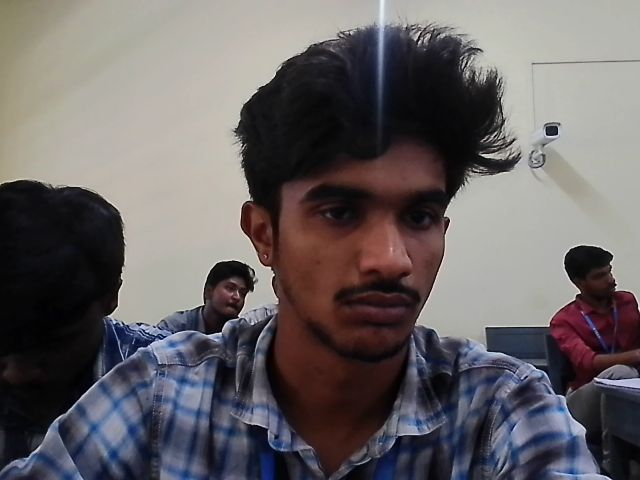

In [ ]:
from IPython.display import Image

# Display the captured photo
Image(filename=photo_filename)

In [ ]:
import time
from IPython.display import clear_output

# Real-time emotion detection loop
for i in range(10):  # Capture 10 frames
    # Capture a photo
    photo_filename = take_photo()

    # Detect emotion
    emotion = detect_emotion(photo_filename)
    print(f"Frame {i+1}: Detected Emotion - {emotion}")

    # Display the photo
    display(Image(filename=photo_filename))

    # Wait for 2 seconds before capturing the next frame
    time.sleep(2)

    # Clear the output for the next frame
    clear_output(wait=True)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
# Import required libraries
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from deepface import DeepFace
from datetime import datetime
import hashlib
import time
import pandas as pd
import random

# ==============================================
# 1. Task Recommendation
# ==============================================
def recommend_task(emotion):
    task_recommendations = {
        "happy": [
            "Work on a creative project or brainstorm new ideas.",
            "Collaborate with teammates on a fun and engaging task.",
            "Take on a challenging task that excites you.",
            "Share your positive energy by helping a colleague."
        ],
        "sad": [
            "Take a short break and listen to calming music.",
            "Reach out to a friend or colleague for a chat.",
            "Write down your thoughts in a journal to reflect on your feelings.",
            "Engage in a light and enjoyable task to lift your mood."
        ],
        "angry": [
            "Step away from the desk and take a walk to cool down.",
            "Practice deep breathing or mindfulness exercises.",
            "Write down what's bothering you and brainstorm solutions.",
            "Engage in a physical activity to release tension."
        ],
        "neutral": [
            "Focus on routine tasks or organize your workspace.",
            "Plan your day and prioritize tasks for maximum productivity.",
            "Learn something new or explore a new tool.",
            "Review your goals and progress."
        ],
        "surprise": [
            "Explore a new tool or learn something new.",
            "Take on a task that challenges your creativity.",
            "Share your excitement with your team and brainstorm ideas.",
            "Reflect on what caused the surprise and how to leverage it."
        ],
        "fear": [
            "Review your tasks and prioritize what's most important.",
            "Break down overwhelming tasks into smaller, manageable steps.",
            "Seek support from a colleague or mentor.",
            "Focus on tasks that build your confidence."
        ],
        "disgust": [
            "Clean your workspace or declutter your environment.",
            "Take a break and engage in a refreshing activity.",
            "Reflect on what caused the feeling and address it.",
            "Switch to a task that aligns with your values and interests."
        ]
    }

    # Get recommendations for the detected emotion
    recommendations = task_recommendations.get(emotion.lower(), ["No specific recommendation."])

    # Return a random recommendation from the list
    return random.choice(recommendations)

# ==============================================
# 2. Historical Mood Tracking
# ==============================================
mood_history = {}

def track_mood(employee_id, mood):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if employee_id not in mood_history:
        mood_history[employee_id] = []
    mood_history[employee_id].append((timestamp, mood))

# ==============================================
# 3. Stress Management Alert
# ==============================================
def check_stress_level(employee_id, threshold=3):
    if employee_id in mood_history:
        negative_moods = [mood for (_, mood) in mood_history[employee_id] if mood in ["sad", "angry", "fear"]]
        if len(negative_moods) >= threshold:
            print(f"Alert: Employee {employee_id} may be experiencing prolonged stress. Notify HR.")

# ==============================================
# 4. Data Privacy and Anonymization
# ==============================================
def anonymize_employee_id(employee_id):
    return hashlib.sha256(employee_id.encode()).hexdigest()

# ==============================================
# 5. Capture Photo from Webcam
# ==============================================
def take_photo(filename='photo.jpg', quality=0.8):
    # JavaScript code to capture a photo from the webcam
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the video to match the camera's aspect ratio
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Get the photo data from JavaScript
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the base64 image data
    binary = b64decode(data.split(',')[1])

    # Save the image to a file
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# ==============================================
# 6. Detect Emotion in Photo
# ==============================================
def detect_emotion(image_path):
    try:
        result = DeepFace.analyze(img_path=image_path, actions=['emotion'])
        dominant_emotion = result[0]['dominant_emotion']
        return dominant_emotion
    except Exception as e:
        return f"Error: {e}"

# ==============================================
# 7. Real-Time Emotion Detection and Task Recommendation
# ==============================================
def real_time_emotion_detection(employee_id):
    for i in range(10):  # Capture 10 frames
        # Capture a photo
        photo_filename = take_photo()

        # Detect emotion
        emotion = detect_emotion(photo_filename)
        print(f"Frame {i+1}: Detected Emotion - {emotion}")

        # Recommend a task
        task = recommend_task(emotion)
        print(f"Recommended Task: {task}")

        # Track mood
        track_mood(employee_id, emotion)

        # Check stress level
        check_stress_level(employee_id)

        # Display the photo
        display(HTML(f"<img src='{photo_filename}' width='400' />"))

        # Wait for 2 seconds before capturing the next frame
        time.sleep(2)

        # Clear the output for the next frame
        display(HTML(""))

# ==============================================
# 8. Main Function to Run the System
# ==============================================
def main():
    # Example employee ID
    employee_id = "123"
    anonymized_id = anonymize_employee_id(employee_id)

    # Start real-time emotion detection
    real_time_emotion_detection(anonymized_id)

    # Display mood history (if any)
    if anonymized_id in mood_history:
        print(f"Mood History for Employee {anonymized_id}:")
        for timestamp, mood in mood_history[anonymized_id]:
            print(f"{timestamp}: {mood}")
    else:
        print(f"No mood data recorded for Employee {anonymized_id}.")

# Run the system
if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>

Frame 1: Detected Emotion - Error: Face could not be detected in photo.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Recommended Task: No specific recommendation.


<IPython.core.display.Javascript object>

Frame 2: Detected Emotion - Error: Face could not be detected in photo.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Recommended Task: No specific recommendation.


<IPython.core.display.Javascript object>

Frame 3: Detected Emotion - Error: Face could not be detected in photo.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Recommended Task: No specific recommendation.


<IPython.core.display.Javascript object>

Frame 4: Detected Emotion - happy
Recommended Task: Work on a creative project or brainstorm new ideas.


<IPython.core.display.Javascript object>

Frame 5: Detected Emotion - neutral
Recommended Task: Review your goals and progress.


<IPython.core.display.Javascript object>

Frame 6: Detected Emotion - neutral
Recommended Task: Review your goals and progress.


<IPython.core.display.Javascript object>

Frame 7: Detected Emotion - neutral
Recommended Task: Focus on routine tasks or organize your workspace.


<IPython.core.display.Javascript object>

Frame 8: Detected Emotion - neutral
Recommended Task: Learn something new or explore a new tool.


<IPython.core.display.Javascript object>

Frame 9: Detected Emotion - neutral
Recommended Task: Focus on routine tasks or organize your workspace.


<IPython.core.display.Javascript object>

Frame 10: Detected Emotion - neutral
Recommended Task: Plan your day and prioritize tasks for maximum productivity.


Mood History for Employee a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3:
2025-03-18 06:04:16: Error: Face could not be detected in photo.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
2025-03-18 06:04:19: Error: Face could not be detected in photo.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
2025-03-18 06:04:23: Error: Face could not be detected in photo.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
2025-03-18 06:04:27: happy
2025-03-18 06:04:31: neutral
2025-03-18 06:04:34: neutral
2025-03-18 06:04:38: neutral
2025-03-18 06:04:41: neutral
2025-03-18 06:04:45: neutral
2025-03-18 06:04:48: neutral


<IPython.core.display.Javascript object>

Frame 1: Detected Emotion - neutral
Recommended Task: Focus on routine tasks or organize your workspace.


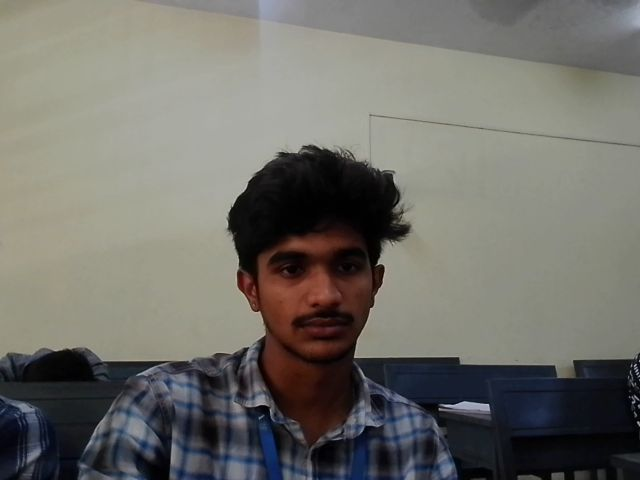

<IPython.core.display.Javascript object>

Frame 2: Detected Emotion - happy
Recommended Task: Share your positive energy by helping a colleague.


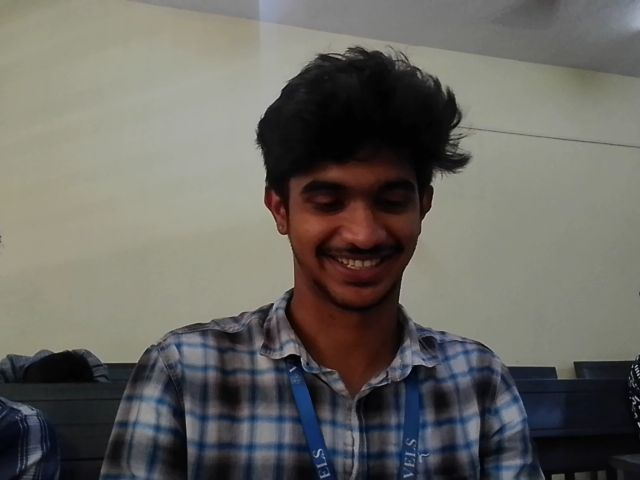

<IPython.core.display.Javascript object>

Frame 3: Detected Emotion - happy
Recommended Task: Share your positive energy by helping a colleague.


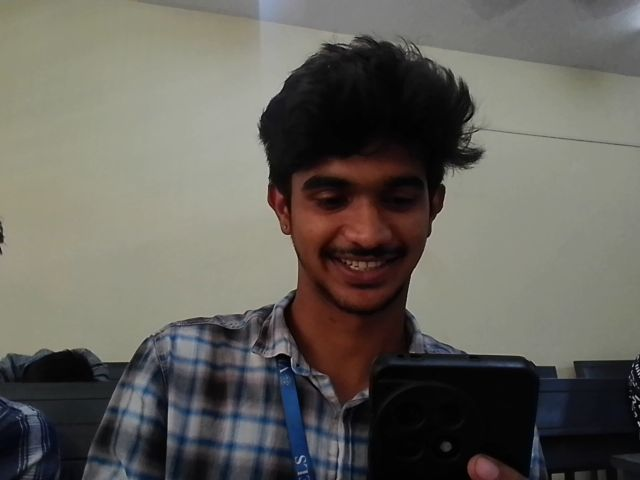

<IPython.core.display.Javascript object>

Frame 4: Detected Emotion - neutral
Recommended Task: Focus on routine tasks or organize your workspace.


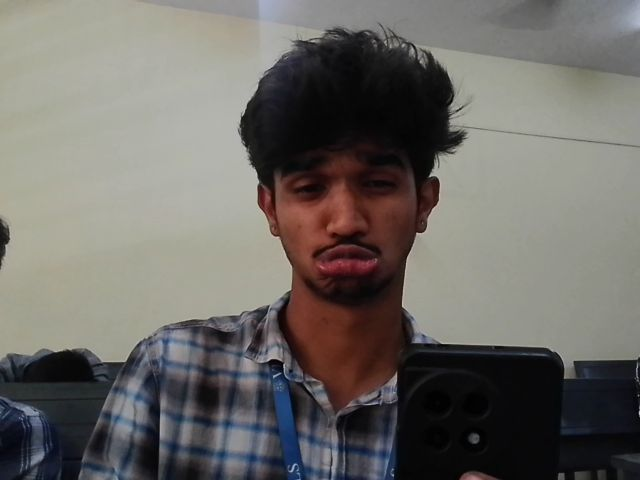

<IPython.core.display.Javascript object>

Frame 5: Detected Emotion - neutral
Recommended Task: Learn something new or explore a new tool.


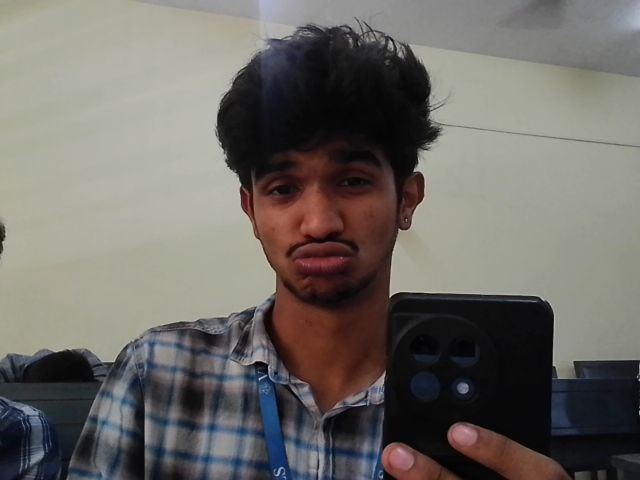

<IPython.core.display.Javascript object>

Frame 6: Detected Emotion - neutral
Recommended Task: Review your goals and progress.


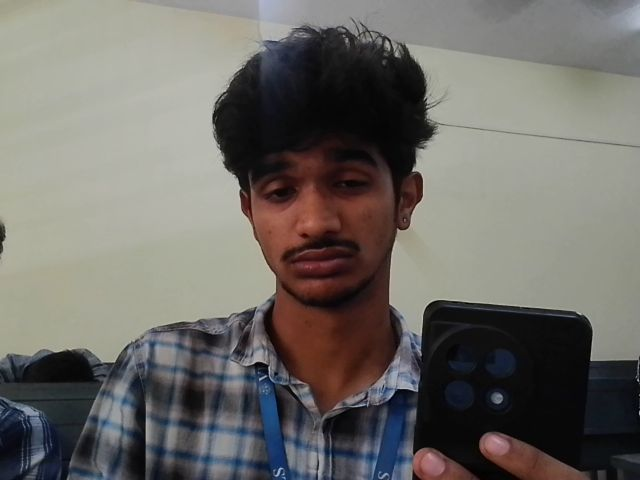

<IPython.core.display.Javascript object>

Frame 7: Detected Emotion - happy
Recommended Task: Take on a challenging task that excites you.


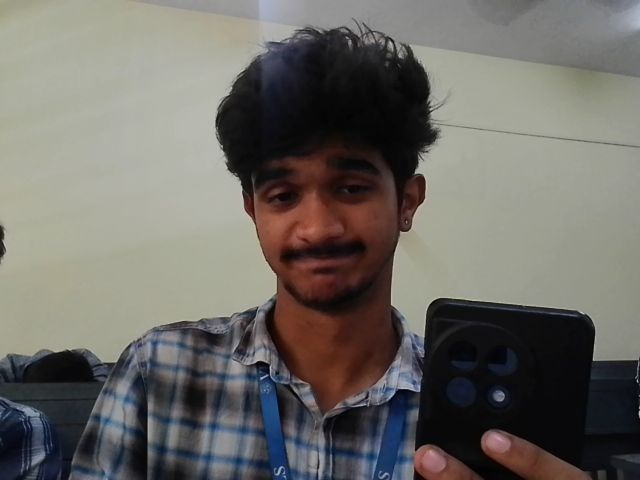

<IPython.core.display.Javascript object>

Frame 8: Detected Emotion - happy
Recommended Task: Collaborate with teammates on a fun and engaging task.


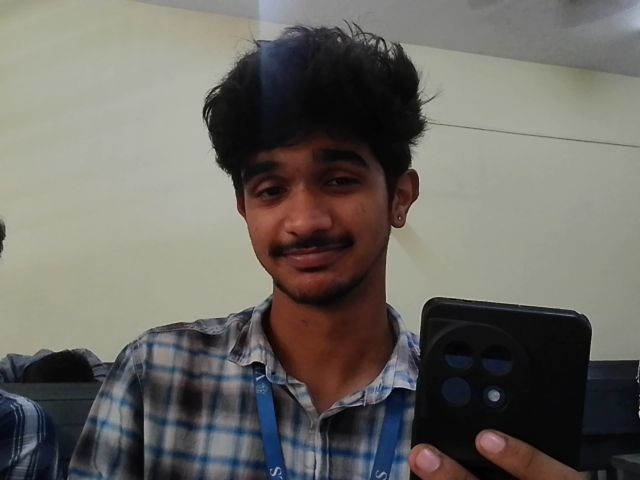

<IPython.core.display.Javascript object>

Frame 9: Detected Emotion - neutral
Recommended Task: Plan your day and prioritize tasks for maximum productivity.


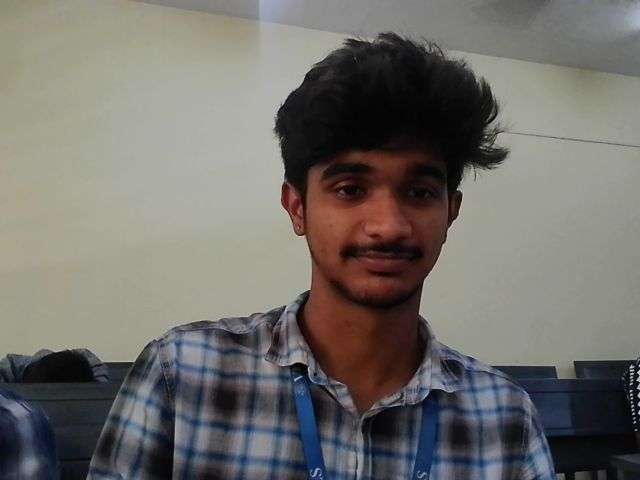

KeyboardInterrupt: 

In [ ]:
# Import required libraries
from IPython.display import display, Javascript, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from deepface import DeepFace
from datetime import datetime
import hashlib
import time
import pandas as pd
import random

# ==============================================
# 1. Task Recommendation
# ==============================================
def recommend_task(emotion):
    task_recommendations = {
        "happy": [
            "Work on a creative project or brainstorm new ideas.",
            "Collaborate with teammates on a fun and engaging task.",
            "Take on a challenging task that excites you.",
            "Share your positive energy by helping a colleague."
        ],
        "sad": [
            "Take a short break and listen to calming music.",
            "Reach out to a friend or colleague for a chat.",
            "Write down your thoughts in a journal to reflect on your feelings.",
            "Engage in a light and enjoyable task to lift your mood."
        ],
        "angry": [
            "Step away from the desk and take a walk to cool down.",
            "Practice deep breathing or mindfulness exercises.",
            "Write down what's bothering you and brainstorm solutions.",
            "Engage in a physical activity to release tension."
        ],
        "neutral": [
            "Focus on routine tasks or organize your workspace.",
            "Plan your day and prioritize tasks for maximum productivity.",
            "Learn something new or explore a new tool.",
            "Review your goals and progress."
        ],
        "surprise": [
            "Explore a new tool or learn something new.",
            "Take on a task that challenges your creativity.",
            "Share your excitement with your team and brainstorm ideas.",
            "Reflect on what caused the surprise and how to leverage it."
        ],
        "fear": [
            "Review your tasks and prioritize what's most important.",
            "Break down overwhelming tasks into smaller, manageable steps.",
            "Seek support from a colleague or mentor.",
            "Focus on tasks that build your confidence."
        ],
        "disgust": [
            "Clean your workspace or declutter your environment.",
            "Take a break and engage in a refreshing activity.",
            "Reflect on what caused the feeling and address it.",
            "Switch to a task that aligns with your values and interests."
        ]
    }

    # Get recommendations for the detected emotion
    recommendations = task_recommendations.get(emotion.lower(), ["No specific recommendation."])

    # Return a random recommendation from the list
    return random.choice(recommendations)

# ==============================================
# 2. Historical Mood Tracking
# ==============================================
mood_history = {}

def track_mood(employee_id, mood):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    if employee_id not in mood_history:
        mood_history[employee_id] = []
    mood_history[employee_id].append((timestamp, mood))

# ==============================================
# 3. Stress Management Alert
# ==============================================
def check_stress_level(employee_id, threshold=3):
    if employee_id in mood_history:
        negative_moods = [mood for (_, mood) in mood_history[employee_id] if mood in ["sad", "angry", "fear"]]
        if len(negative_moods) >= threshold:
            print(f"Alert: Employee {employee_id} may be experiencing prolonged stress. Notify HR.")

# ==============================================
# 4. Data Privacy and Anonymization
# ==============================================
def anonymize_employee_id(employee_id):
    return hashlib.sha256(employee_id.encode()).hexdigest()

# ==============================================
# 5. Capture Photo from Webcam
# ==============================================
def take_photo(filename='photo.jpg', quality=0.8):
    # JavaScript code to capture a photo from the webcam
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the video to match the camera's aspect ratio
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Get the photo data from JavaScript
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the base64 image data
    binary = b64decode(data.split(',')[1])

    # Save the image to a file
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# ==============================================
# 6. Detect Emotion in Photo
# ==============================================
def detect_emotion(image_path):
    try:
        result = DeepFace.analyze(img_path=image_path, actions=['emotion'])
        dominant_emotion = result[0]['dominant_emotion']
        return dominant_emotion
    except Exception as e:
        return f"Error: {e}"

# ==============================================
# 7. Real-Time Emotion Detection and Task Recommendation
# ==============================================
def real_time_emotion_detection(employee_id):
    for i in range(10):  # Capture 10 frames
        # Capture a photo
        photo_filename = take_photo()

        # Detect emotion
        emotion = detect_emotion(photo_filename)
        print(f"Frame {i+1}: Detected Emotion - {emotion}")

        # Recommend a task
        task = recommend_task(emotion)
        print(f"Recommended Task: {task}")

        # Track mood
        track_mood(employee_id, emotion)

        # Check stress level
        check_stress_level(employee_id)

        # Display the photo
        display(Image(filename=photo_filename, width=400))

        # Wait for 2 seconds before capturing the next frame
        time.sleep(2)

        # Clear the output for the next frame
        display(HTML(""))

# ==============================================
# 8. Main Function to Run the System
# ==============================================
def main():
    # Example employee ID
    employee_id = "123"
    anonymized_id = anonymize_employee_id(employee_id)

    # Start real-time emotion detection
    real_time_emotion_detection(anonymized_id)

    # Display mood history (if any)
    if anonymized_id in mood_history:
        print(f"Mood History for Employee {anonymized_id}:")
        for timestamp, mood in mood_history[anonymized_id]:
            print(f"{timestamp}: {mood}")
    else:
        print(f"No mood data recorded for Employee {anonymized_id}.")

# Run the system
if __name__ == "__main__":
    main()

In [ ]:
# Import required libraries
import cv2
import numpy as np
from deepface import DeepFace
from datetime import datetime
import hashlib
import time
import sqlite3
import librosa
import soundfile as sf
from sklearn.ensemble import RandomForestClassifier
import streamlit as st

# ==============================================
# 1. Task Recommendation
# ==============================================
def recommend_task(emotion):
    task_recommendations = {
        "happy": [
            "Work on a creative project or brainstorm new ideas.",
            "Collaborate with teammates on a fun and engaging task.",
            "Take on a challenging task that excites you.",
            "Share your positive energy by helping a colleague."
        ],
        "sad": [
            "Take a short break and listen to calming music.",
            "Reach out to a friend or colleague for a chat.",
            "Write down your thoughts in a journal to reflect on your feelings.",
            "Engage in a light and enjoyable task to lift your mood."
        ],
        "angry": [
            "Step away from the desk and take a walk to cool down.",
            "Practice deep breathing or mindfulness exercises.",
            "Write down what's bothering you and brainstorm solutions.",
            "Engage in a physical activity to release tension."
        ],
        "neutral": [
            "Focus on routine tasks or organize your workspace.",
            "Plan your day and prioritize tasks for maximum productivity.",
            "Learn something new or explore a new tool.",
            "Review your goals and progress."
        ],
        "surprise": [
            "Explore a new tool or learn something new.",
            "Take on a task that challenges your creativity.",
            "Share your excitement with your team and brainstorm ideas.",
            "Reflect on what caused the surprise and how to leverage it."
        ],
        "fear": [
            "Review your tasks and prioritize what's most important.",
            "Break down overwhelming tasks into smaller, manageable steps.",
            "Seek support from a colleague or mentor.",
            "Focus on tasks that build your confidence."
        ],
        "disgust": [
            "Clean your workspace or declutter your environment.",
            "Take a break and engage in a refreshing activity.",
            "Reflect on what caused the feeling and address it.",
            "Switch to a task that aligns with your values and interests."
        ]
    }

    # Get recommendations for the detected emotion
    recommendations = task_recommendations.get(emotion.lower(), ["No specific recommendation."])

    # Return a random recommendation from the list
    return random.choice(recommendations)

# ==============================================
# 2. Database Integration
# ==============================================
conn = sqlite3.connect('mood_history.db')
cursor = conn.cursor()

# Create a table to store mood history
cursor.execute('''
CREATE TABLE IF NOT EXISTS mood_history (
    employee_id TEXT,
    timestamp TEXT,
    mood TEXT
)
''')
conn.commit()

def save_mood_to_db(employee_id, mood):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    cursor.execute('''
    INSERT INTO mood_history (employee_id, timestamp, mood)
    VALUES (?, ?, ?)
    ''', (employee_id, timestamp, mood))
    conn.commit()

def get_mood_history(employee_id):
    cursor.execute('''
    SELECT timestamp, mood FROM mood_history
    WHERE employee_id = ?
    ''', (employee_id,))
    return cursor.fetchall()

# ==============================================
# 3. Speech Emotion Recognition
# ==============================================
speech_model = RandomForestClassifier()  # Replace with your trained model

def extract_speech_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

def predict_speech_emotion(audio_path):
    features = extract_speech_features(audio_path)
    emotion = speech_model.predict([features])[0]  # Replace with your model
    return emotion

# ==============================================
# 4. Streamlit App
# ==============================================
def main():
    st.title("Real-Time Emotion Detection and Task Recommendation")

    # Employee ID input
    employee_id = st.text_input("Enter Employee ID:")

    if employee_id:
        anonymized_id = anonymize_employee_id(employee_id)

        # Capture photo and detect emotion
        if st.button("Capture Photo and Detect Emotion"):
            photo_filename = take_photo()
            emotion = detect_emotion(photo_filename)
            task = recommend_task(emotion)

            # Display results
            st.image(photo_filename, caption="Captured Photo", width=300)
            st.write(f"Detected Emotion: {emotion}")
            st.write(f"Recommended Task: {task}")

            # Save mood to database
            save_mood_to_db(anonymized_id, emotion)

        # Display mood history
        st.subheader("Mood History")
        mood_history = get_mood_history(anonymized_id)
        if mood_history:
            for timestamp, mood in mood_history:
                st.write(f"{timestamp}: {mood}")
        else:
            st.write("No mood data recorded.")

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
from deepface import DeepFace
import cv2

# Analyze the captured photo for emotions
def detect_emotion(image_path):
    try:
        result = DeepFace.analyze(img_path=image_path, actions=['emotion'])
        dominant_emotion = result[0]['dominant_emotion']
        return dominant_emotion
    except Exception as e:
        return f"Error: {e}"

# Detect emotion in the captured photo
emotion = detect_emotion(photo_filename)
print(f"Detected Emotion: {emotion}")

25-03-18 05:41:45 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 111MB/s]


Detected Emotion: sad


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    # JavaScript code to capture a photo from the webcam
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the video to match the camera's aspect ratio
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Get the photo data from JavaScript
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the base64 image data
    binary = b64decode(data.split(',')[1])

    # Save the image to a file
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture a photo from the webcam
photo_filename = take_photo()
print(f"Photo saved as {photo_filename}")

<IPython.core.display.Javascript object>

Photo saved as photo.jpg
